# Model Testing with unkown data

In [1]:
import os
from PIL import Image
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras_preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

2024-04-12 19:10:52.159316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 19:10:52.159379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 19:10:52.160773: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-12 19:10:52.168460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 19:10:53.420911: W tensorflow/compiler/tf2

In [2]:
model = keras.models.load_model('./checkpoints/Resnet50_final_t_model/model_epoch-max.h5')

2024-04-12 19:10:56.074598: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 19:10:56.119779: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 19:10:56.119883: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 19:10:56.123465: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 19:10:56.123568: I external/local_xla/xla/stream_executor

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


test_datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size and image dimensions
batch_size = 32
img_height, img_width = 128, 128  # Assuming input image dimensions for your model

# Create a test generator using flow_from_directory
test_generator = test_datagen.flow_from_directory(
    './dataset/faking',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  
)

Found 10000 images belonging to 2 classes.


In [4]:
test_generator.class_indices

{'fakecs': 0, 'val2017': 1}

In [5]:
true_labels = test_generator.classes
print(true_labels)

[0 0 0 ... 1 1 1]


In [6]:
# Evaluate the model on the test generator
eval_results = model.evaluate(test_generator)

# Print the evaluation results
print("Evaluation Results:")
print("Loss:", eval_results[0])
print("Accuracy:", eval_results[1])


/home/viren/.local/lib/python3.10/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-04-12 19:11:03.864598: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-12 19:11:04.004288: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-12 19:11:04.326790: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


313/313 [==============================] - 257s 716ms/step - loss: 0.3754 - binary_accuracy: 0.8353
Evaluation Results:
Loss: 0.37542101740837097
Accuracy: 0.8353000283241272


In [18]:
# Make predictions on the test generator
predictions = model.predict(test_generator)
pred_labels = []
for i in predictions:
    if i >0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print(pred_labels)
# predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 238s 763ms/step
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1

In [19]:
# Generate classification report with precision, recall, and F1-score
class_report = classification_report(true_labels, pred_labels, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

      fakecs       0.88      0.78      0.83      5000
     val2017       0.80      0.89      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000



In [20]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(true_labels, pred_labels)

print(f"AUC Score: {auc_score}")


AUC Score: 0.8353


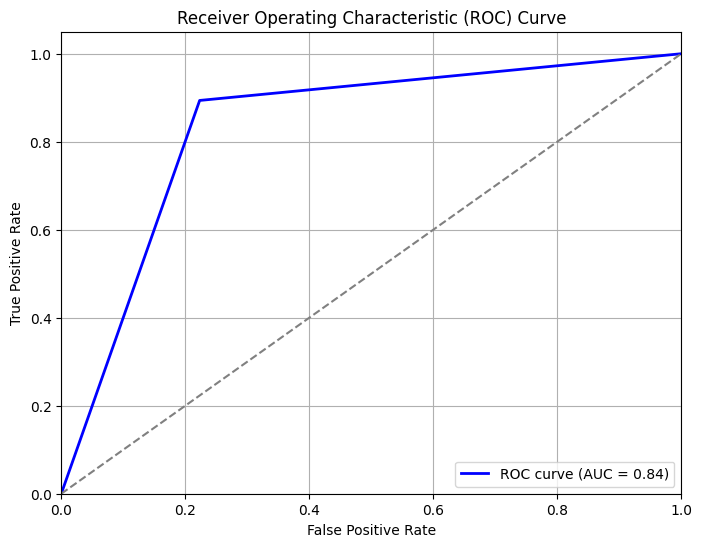

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(true_labels, pred_labels)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

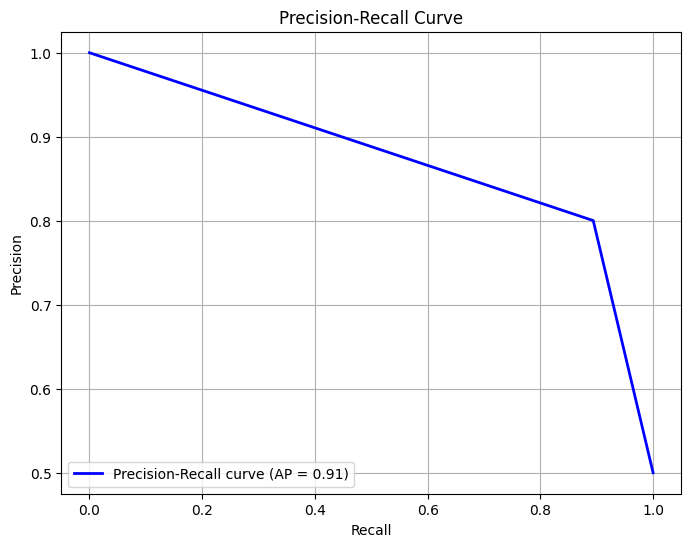

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(true_labels, pred_labels)

# Calculate Average Precision (AP)
average_precision = average_precision_score(true_labels, predictions)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


## Real Image test (Coco TEST)


In [7]:
def eval_real_val2017():
    dir = './dataset/faking/val2017/'
    img_names = os.listdir(dir)
    count_0 = 0
    count_1 = 0
    a = None
    for img_name in tqdm(img_names):

        img = cv2.imread(dir+img_name)
        img = cv2.resize(img, (128, 128))  # Resize the image
        x = image.img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)

        # Get the model's prediction
        classes = model.predict(x,verbose=False)
        a = classes[0]

        if(a>=0.5):
            count_1+=1
        else:
            count_0+=1
    return f"real = {count_1} , fake =  {count_0}"

In [8]:
eval_real_val2017()

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [06:34<00:00, 12.69it/s]  


'real = 4447 , fake =  553'

In [10]:
def eval_real_gauss():
    dir = './dataset/faking/val2017/'
    img_names = os.listdir(dir)
    count_0 = 0
    count_1 = 0
    a = None
    for img_name in tqdm(img_names):
        # img = Image.open(dir+img_name)
        # x = np.asarray([cv2.GaussianBlur(np.asarray(img.resize((128,128))),(5,5),0)])/255.0
        # a = model.predict(x, verbose=False)[0]
        img = cv2.GaussianBlur(cv2.imread(dir+img_name),(5,5),0)
        img = cv2.resize(img, (128, 128))  # Resize the image
        x = image.img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)

        # Get the model's prediction
        classes = model.predict(x,verbose=False)
        a = classes[0]
        if(a>=0.5):
            count_1+=1
        else:
            count_0+=1
    return f"real = {count_1} , fake =  {count_0}"

In [11]:
eval_real_gauss()

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [07:18<00:00, 11.40it/s]


'real = 2575 , fake =  2425'

In [ ]:
def eval_xyz_real_val2017():
    dir = './dataset/faking/val2017/'
    img_names = os.listdir(dir)
    count_0 = 0
    count_1 = 0
    a = None
    for img_name in tqdm(img_names):

        img = cv2.cvtColor(cv2.imread(dir+img_name) , cv2.COLOR_BGR2XYZ)
        img = cv2.resize(img, (128, 128))  # Resize the image
        x = image.img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)

        # Get the model's prediction
        classes = model.predict(x,verbose=False)
        a = classes[0]

        if(a>=0.5):
            count_1+=1
        else:
            count_0+=1
    return f"real = {count_1} , fake =  {count_0}"

In [ ]:
eval_xyz_real_val2017()

100%|██████████| 5000/5000 [05:56<00:00, 14.02it/s]


'real = 4294 , fake =  706'

## FAKE Image Test

In [12]:

def eval_fake():
    dir = './dataset/faking/fakecs/'
    img_names = os.listdir(dir)
    count_0 = 0
    count_1 = 0
    a = None
    for img_name in tqdm(img_names):

        img = cv2.imread(dir+img_name)
        img = cv2.resize(img, (128, 128))  # Resize the image
        x = image.img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)

        # Get the model's prediction
        classes = model.predict(x,verbose=False)
        a = classes[0]

        if(a>=0.5):
            count_1+=1
        else:
            count_0+=1
    return f"real = {count_1} , fake =  {count_0}"

In [13]:
eval_fake()

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [07:08<00:00, 11.67it/s]


'real = 655 , fake =  4345'

In [14]:
def eval_fake_gauss():
    dir = './dataset/faking/fakecs/'
    img_names = os.listdir(dir)
    count_0 = 0
    count_1 = 0
    a = None
    for img_name in tqdm(img_names):
        # img = Image.open(dir+img_name)
        # x = np.asarray([cv2.GaussianBlur(np.asarray(img.resize((128,128))),(5,5),0)])/255.0
        # a = model.predict(x, verbose=False)[0]
        img = cv2.GaussianBlur(cv2.imread(dir+img_name),(5,5),0)
        img = cv2.resize(img, (128, 128))  # Resize the image
        x = image.img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)

        # Get the model's prediction
        classes = model.predict(x,verbose=False)
        a = classes[0]
        if(a>=0.5):
            count_1+=1
        else:
            count_0+=1
    return f"real = {count_1} , fake =  {count_0}"

In [15]:
eval_fake_gauss()

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [07:50<00:00, 10.63it/s]


'real = 45 , fake =  4955'

In [16]:
def eval_xyz_fake():
    dir = './dataset/faking/fakecs/'
    img_names = os.listdir(dir)
    count_0 = 0
    count_1 = 0
    a = None
    for img_name in tqdm(img_names):

        img = cv2.cvtColor(cv2.imread(dir+img_name) , cv2.COLOR_BGR2XYZ)
        img = cv2.resize(img, (128, 128))  # Resize the image
        x = image.img_to_array(img)
        x /= 255.0
        x = np.expand_dims(x, axis=0)

        # Get the model's prediction
        classes = model.predict(x,verbose=False)
        a = classes[0]

        if(a>=0.5):
            count_1+=1
        else:
            count_0+=1
    return f"real = {count_1} , fake =  {count_0}"

In [17]:
eval_xyz_fake()

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [07:51<00:00, 10.61it/s]


'real = 1278 , fake =  3722'